In [1]:
%pylab inline
import numpy as np
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def addSphere (mat3d, bulk_size, sph_pos, sph_r, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    sph_pos_int = np.empty(3, dtype=int)
    
    sph_pos_int[0]=int(round((sph_pos[0]+bulk_size[0]/2)/dbulk[0]))
    sph_pos_int[1]=int(round((sph_pos[1]+bulk_size[1]/2)/dbulk[1]))   
    sph_pos_int[2]=int(round((sph_pos[2])/dbulk[2]))
    sph_r_int=int(round(sph_r/dbulk[0]))
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                if (sqrt((x - sph_pos_int[0])**2  + (y - sph_pos_int[1])**2 + (z - sph_pos_int[2])**2) <= sph_r_int):
                    mat3d[x,y,z] = desc
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [3]:
def addXYCyl (mat3d, bulk_size, cyl_pos, cyl_r, cyl_z, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    cyl_pos_int = np.empty(3, dtype=int)
    
    cyl_pos_int[0]=int(round((cyl_pos[0]+bulk_size[0]/2)/dbulk[0]))
    cyl_pos_int[1]=int(round((cyl_pos[1]+bulk_size[1]/2)/dbulk[1]))   
    cyl_pos_int[2]=int(round((cyl_pos[2])/dbulk[2]))
    cyl_r_int=int(round(cyl_r/dbulk[0]))
    cyl_z_int=int(round(cyl_z/dbulk[1]))
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                if ((sqrt((x - cyl_pos_int[0])**2  + (y - cyl_pos_int[1])**2) <= cyl_r_int and abs(z - cyl_pos_int[1]) <= cyl_z_int/2)):
                    mat3d[x,y,z] = desc
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [4]:
def addXZCyl (mat3d, bulk_size, cyl_pos, cyl_r, cyl_y, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    cyl_pos_int = np.empty(3, dtype=int)
    
    cyl_pos_int[0]=int(round((cyl_pos[0]+bulk_size[0]/2)/dbulk[0]))
    cyl_pos_int[1]=int(round((cyl_pos[1]+bulk_size[1]/2)/dbulk[1]))   
    cyl_pos_int[2]=int(round((cyl_pos[2])/dbulk[2]))
    cyl_r_int=int(round(cyl_r/dbulk[0]))
    cyl_y_int=int(round(cyl_y/dbulk[1]))
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                if ((sqrt((x - cyl_pos_int[0])**2  + (z - cyl_pos_int[2])**2) <= cyl_r_int and abs(y - cyl_pos_int[1]) <= cyl_y_int/2)):
                    mat3d[x,y,z] = desc                  
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [5]:
def addYZCyl (mat3d, bulk_size, cyl_pos, cyl_r, cyl_x, desc):
    
    Nbulk = asarray(mat3d.shape)
    dbulk = bulk_size/Nbulk
    
    voxel_inside = 0
    
    cyl_pos_int = np.empty(3, dtype=int)
    
    cyl_pos_int[0]=int(round((cyl_pos[0]+bulk_size[0]/2)/dbulk[0]))
    cyl_pos_int[1]=int(round((cyl_pos[1]+bulk_size[1]/2)/dbulk[1]))   
    cyl_pos_int[2]=int(round((cyl_pos[2])/dbulk[2]))
    cyl_r_int=int(round(cyl_r/dbulk[0]))
    cyl_x_int=int(round(cyl_y/dbulk[1]))
    
    for x in range(Nbulk[0]):
        for y in range(Nbulk[1]):
            for z in range(Nbulk[2]):
                if ((sqrt((y - cyl_pos_int[1])**2  + (z - cyl_pos_int[2])**2) <= cyl_r_int and abs(x - cyl_pos_int[0]) <= cyl_x_int/2)):
                    mat3d[x,y,z] = desc
                    voxel_inside += 1
    print(voxel_inside, mat3d.size)

In [11]:
grid_size = 5
thickness = 5
size_lat = 4*thickness*grid_size
size_depth = thickness*grid_size

bulk3d = np.full((size_lat,size_lat,size_depth),1,dtype=int)
bulk3d.shape
bulk3d_size = [4*thickness, 4*thickness, thickness]

sphere_pos = (-1.9, 0, 1.35)
addSphere(bulk3d, bulk3d_size, sphere_pos, 0.595, 2)

slice_z = sphere_pos[2] * grid_size
slice_x = sphere_pos[0] * grid_size + 2*thickness
plt.imshow(bulk3d[40,:,:].T,vmin=1,vmax=2)
#cbar = plt.colorbar()

273 250000
273 250000
273 250000


/home/nicolas/.local/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


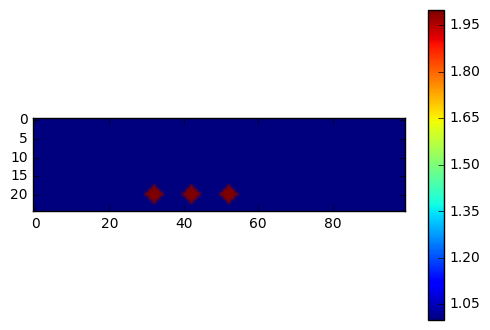

In [12]:
cyl_pos1 = (-3.5, 0, 4.)
cyl_pos2 = (-1.5, 0, 4.)
cyl_pos3 = (0.5, 0, 4.)
addXZCyl(bulk3d, bulk3d_size, cyl_pos1, 0.5, 4, 2)
addXZCyl(bulk3d, bulk3d_size, cyl_pos2, 0.5, 4, 2)
addXZCyl(bulk3d, bulk3d_size, cyl_pos3, 0.5, 4, 2)

plt.imshow(bulk3d[:,size_lat/2,:].T,vmin=1)
cbar = plt.colorbar()

In [13]:
filename = "3Dbulk-3cyls-4"
filename_back = "3Dbulk-3cyls-fondo"

In [14]:
bulk_flat = bulk3d.T.reshape(1,size_lat*size_lat*size_depth)
print(bulk_flat.shape)
with open(filename,"wb") as f:
                savetxt(f, bulk_flat, fmt='%i', delimiter=" ")

(1, 250000)


In [11]:
bulk_flat_back = np.full((size_lat,size_lat,size_depth),1,dtype=int).reshape(1,size_lat*size_lat*size_depth)
print(bulk_flat_back.shape)
with open(filename_back,"wb") as f:
                savetxt(f, bulk_flat_back, fmt='%i', delimiter=" ")

(1, 250000)
